In [3]:
import numpy as np

# training data set 준비

# x_data => 독립변수(공부시간)
x_data = np.array([1,2,3,4,5], dtype=np.float64).reshape(5,1)

# t_data => 정답 데이터(시험점수)
t_data = np.array([3,5,7,9,11], dtype=np.float64).reshape(5,1)

# weight & bias 정의
W = np.random.rand(1,1)  # 1행 1열짜리(값은 1개) ndarray를 만들고
                         # 0과 1사이의 균등분포에서 실수 난수를 추출
b = np.random.rand(1)  

# loss function
def loss_func(input_data):  # loss 함수는 w와 b의 함수
                            # input_data => [W b]
    
    input_W = input_data[0].reshape(1,1)
    input_b = input_data[1]
    
    # 예측값
    # 행렬끼리 곱할 때 np.dot 사용
    y = np.dot(x_data, input_W) + input_b
    
    # MSE(평균제곱오차)
    # np.power(a,b) => a^b
    return np.mean(np.power(t_data - y,2))

# predict function (예측함수, 모델, hypothesis)
def predict(x):
    y = np.dot(x,W) + b
    
    return y

# 다변수 함수에 대해 수치미분을 수행하는 함수
def numerical_derivative(f,x):    
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        tmp = x[idx]             
        
        x[idx] = tmp + delta_x   
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp              
        it.iternext()
        
    return derivative_x


# learnig rate의 값 설정
# learning rate는 우리가 설정해야한는 값
# 학습이 진행되는 과정을 살펴보면서 이 값을 적절하게 수정해야함
# 초기에는 1e-4, 1e-3 정도로 설정해서 사용
learning_rate = 1e-4

# 학습과정 진행
for step in range(300000):
    
    # ravel()은 다차원 배열을 1차원 배열로 바꿈
    input_param = np.concatenate((W.ravel(), b.ravel()),axis=0)  # [W b]
    
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W, b, loss_func(input_param)))

W : [[0.80657713]], b : [0.46731633], loss : 19.764892752749102
W : [[2.01885661]], b : [0.93192164], loss : 0.0008435898067700211
W : [[2.00683843]], b : [0.9753111], loss : 0.00011094724412455195
W : [[2.00247998]], b : [0.99104647], loss : 1.4591559641956136e-05
W : [[2.00089938]], b : [0.99675297], loss : 1.919052739561547e-06
W : [[2.00032616]], b : [0.99882245], loss : 2.5238997801622854e-07
W : [[2.00011828]], b : [0.99957296], loss : 3.319382510386946e-08
W : [[2.0000429]], b : [0.99984513], loss : 4.365585486935514e-09
W : [[2.00001556]], b : [0.99994384], loss : 5.741530716479601e-10
W : [[2.00000564]], b : [0.99997963], loss : 7.55114635812324e-11


In [4]:
# 6시간 공부하면 몇점일지를 예측해 보아요!

predict_date = predict(np.array([[6]]))
print('6시간 공부했을 때 점수 : ', predict_date)

6시간 공부했을 때 점수 :  [[13.00000489]]


In [5]:
# python으로 아주 간단한 simple linear regression을 이용해 머신러닝을 구현해 보았다!
# sklearn(scikit-learn) => 사용하려면 설치해야함
# pip install sklearn
import numpy as np
from sklearn import linear_model

# training data set 준비

x_data = np.array([1,2,3,4,5], dtype=np.float64).reshape(5,1)
t_data = np.array([3,5,7,9,11], dtype=np.float64).reshape(5,1)

# model 생성 (simple linear model)
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data,t_data)

# 학습이 끝났으니 구한 W와 b를 출력해보자
print('W : {}, b : {}'.format(model.coef_,model.intercept_))

# model을 이용한 예측
print(model.predict(np.array([[6]])))  # [[13.]]

W : [[2.]], b : [1.]
[[13.]]


In [6]:
# Ozone량 예측하는 모델을 만들자

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def numerical_derivative(f,x):    
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)  
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        tmp = x[idx]             
        
        x[idx] = tmp + delta_x   
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp              
        it.iternext()
        
    return derivative_x


# Raw data set loading
df = pd.read_csv('./data/ozone.csv')
display(df.head())

# ozone(오존량) : 종속변수
# solar.R(태양광 세기), wind(바람), temp(온도) : 독립변수
# 우리는 지금 simple linear regression을 하고있기 때문에 독립변수 1개만 사용
# 3개중에 temp를 사용할거임
# 온도에 따른 오존량 예측 모델을 만들자
training_data = df[['Ozone','Temp']]
# display(training_data)
# print(training_data.shape)  # (153, 2)

# 데이터에 결치값 존재
training_data.info()
# 결치값을 삭제하는 방법 -> 데이터가 충분할 때
# 결치값을 다른값으로 대체 -> 데이터가 많이 없을때

# 여기서는 결치값 삭제

training_data.dropna(how='any',
                     inplace=True)  # how='any' : 결치가 존재하는 행을 삭제

# training data set
# reshape(-1,1) 열은 한줄로 하고 나머지는 행으로 밀어넣기
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W)
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    
    return y

# learning rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    # ravel()은 다차원 배열을 1차원 배열로 바꿈
    input_param = np.concatenate((W.ravel(), b.ravel()),axis=0)  # [W b]
    
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W, b, loss_func(input_param)))

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   116 non-null    float64
 1   Temp    153 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


C:\Users\user\AppData\Local\Temp\ipykernel_16784\2810913233.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


W : [[0.63379848]], b : [0.75741149], loss : 892.2425954146381
W : [[0.5683815]], b : [0.75741149], loss : 865.9113792359444
W : [[0.5683815]], b : [0.75741149], loss : 865.9113792359444
W : [[0.5683815]], b : [0.75741149], loss : 865.9113792359444
W : [[0.5683815]], b : [0.75741149], loss : 865.9113792359444
W : [[0.5683815]], b : [0.75741149], loss : 865.9113792359444
W : [[0.5683815]], b : [0.75741149], loss : 865.9113792359444
W : [[0.5683815]], b : [0.75741149], loss : 865.9113792359444
W : [[0.5683815]], b : [0.75741149], loss : 865.9113792359444
W : [[0.5683815]], b : [0.75741149], loss : 865.9113792359444


In [7]:
# 학습종료 후 예측 (Temp : 62)
predict_data = predict(np.array([[62]]))
print('온도가 62일때 오존량 : {}'.format(predict_data))  # [[16.88715564]]

온도가 62일때 오존량 : [[35.99706442]]


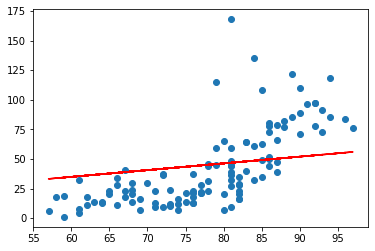

In [8]:
# 그래프로 표현해 보아요!
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), x_data.ravel()*W.ravel() + b, color='r')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16784\3247804505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


sklearn으로 구한 온도가 62도 일때의 오존량 : [[3.58411393]]


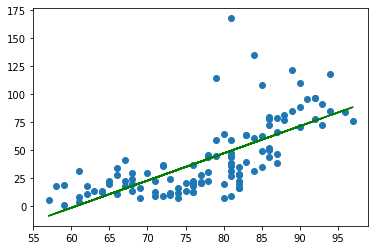

In [9]:
# 같은 데이터로 sklearn을 이용해서 구현해 보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일때의 오존량 : {}'.format(result))  
# [[3.58411393]]

# 그래프 표현
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), 
         x_data.ravel()*model.coef_.ravel() + model.intercept_, color='g')
plt.show()